## Haberman EDA Assignment

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar analysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('haberman.csv')
df.columns = ['age', 'operation_year', 'axil_nodes', 'surv_status']
df.head()

,age,operation_year,axil_nodes,surv_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
df['surv_status'][df['surv_status'] == 1] = 'yes'
df['surv_status'][df['surv_status'] == 2] = 'no'
df.head()

,age,operation_year,axil_nodes,surv_status
0,30,62,3,yes
1,30,65,0,yes
2,31,59,2,yes
3,31,65,4,yes
4,33,58,10,yes


In [4]:
df.shape

(305, 4)

In [5]:
df['surv_status'].value_counts()

yes    224
no      81
Name: surv_status, dtype: int64

### Dataset Observations

**Objective**: Find a method based on given features to classify the survival status of a patient.

* **Number of points**: 305
* **Number of features**: 4
    - age: Age of patient at time of operation (numerical)
    - operation_year: Patient's year of operation (year - 1900, numerical)
    - axil_nodes: Number of positive axillary nodes detected (numerical)
    - surv_status: Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year
* **Number of classes**: 2
* **Number of data points per class**:
    - surv_status(1): 224
    - surv_status(2): 81

## 1.0 Bivariate Analysis

### 1.1 Pair Plots

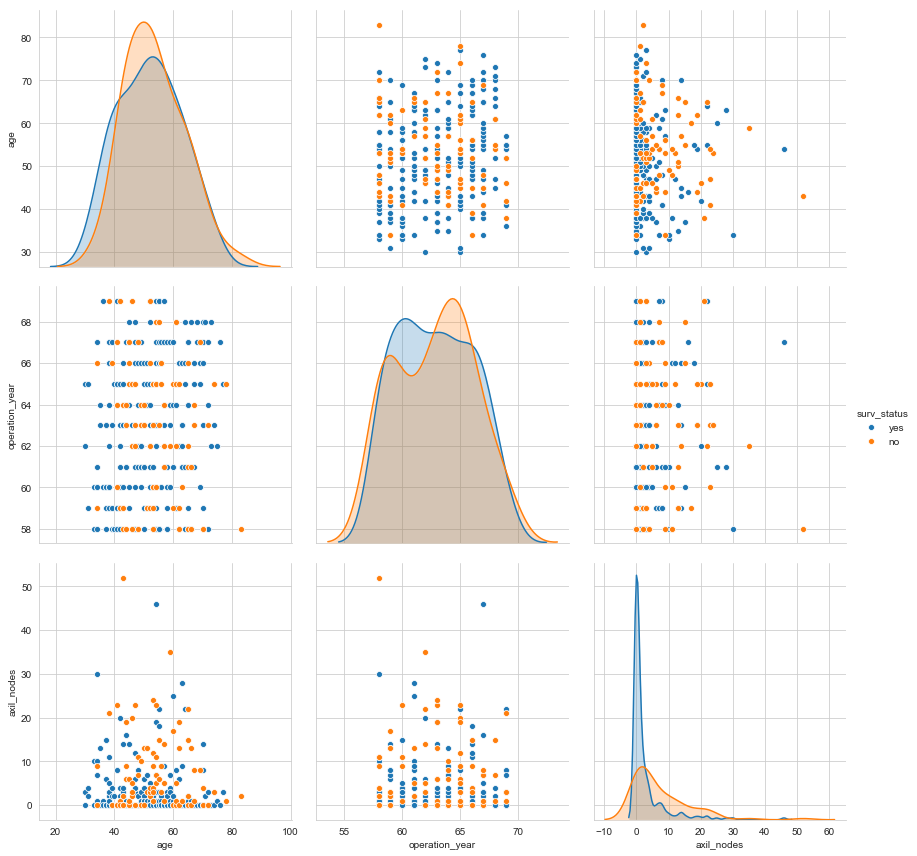

In [6]:
sns.set_style('whitegrid')
sns.pairplot(df, hue='surv_status',size=4)
plt.show()

**Observations From The Plot Above**: Cannot clearly distinguish amongst the two classes after considering two variables at a time from among the 3 in total (axil_nodes, operation_year, age). Most of the data points are overlapping and there is no way we can segregate the three classes using simple conditions.

### 1.2 Scatter Plots

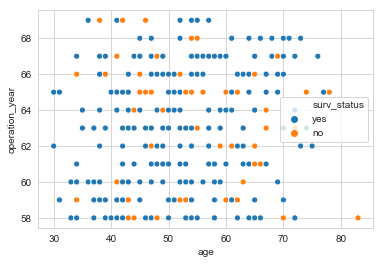

In [7]:
sns.scatterplot(data=df, x='age', y='operation_year', hue='surv_status')
plt.show()

**Observations From The Plot Above**: Cannot find any segregation amongst the two classes (surv_status = 1 & 2) when plotting the data points based on operation_year and age.

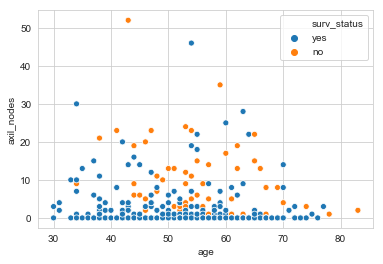

In [8]:
sns.scatterplot(data=df, x='age', y='axil_nodes', hue='surv_status')
plt.show()

**Observations From The Plot Above**: Cannot find any segregation amongst the two classes (surv_status = 1 & 2) when plotting the data points based on axil_nodes and age.

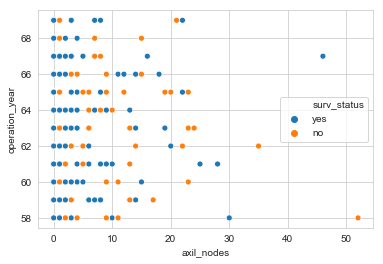

In [9]:
sns.scatterplot(data=df, x='axil_nodes', y='operation_year', hue='surv_status')
plt.show()

**Observations From The Plot Above**: Cannot find any segregation amongst the two classes when plotting the data points based on operation_year and axil_nodes.

## 2.0 Univariate Analysis

In [10]:
df_surv = df[df['surv_status'] == 'yes']
df_unsurv = df[df['surv_status'] == 'no']

### 2.1 Histograms

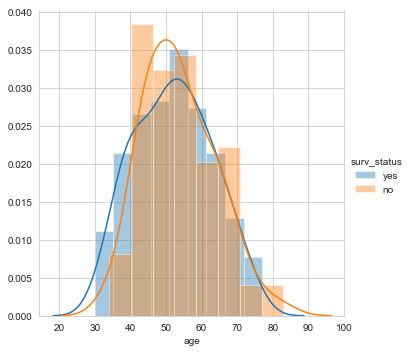

In [11]:
sns.FacetGrid(df, hue='surv_status', size=5) \
   .map(sns.distplot, 'age', ) \
   .add_legend()
plt.show()

**Observations From The Plot Above**: pdf of both the graphs (surv_status = 1 & 2) overlap to a large extent, hence making it difficult to segregate the two classes when considering a single parameter *age*.

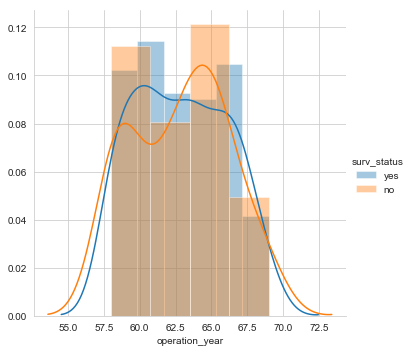

In [12]:
sns.FacetGrid(df, hue='surv_status', size=5) \
   .map(sns.distplot, 'operation_year', ) \
   .add_legend()
plt.show()

**Observations From The Plot Above**: pdf of both the graphs (surv_status = 1 & 2) overlap to a large extent, hence making it difficult to segregate the two classes when considering a single parameter *operation_year*.

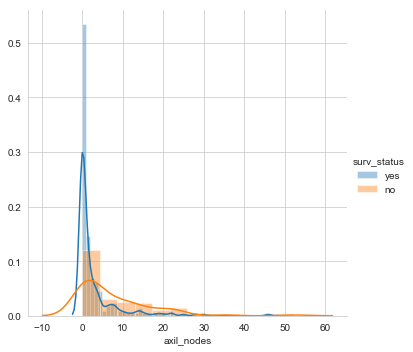

In [13]:
sns.FacetGrid(df, hue='surv_status', size=5) \
   .map(sns.distplot, 'axil_nodes', ) \
   .add_legend()
plt.show()

**Observations From The Plot Above**: pdf of both the graphs (surv_status = 1 & 2) overlap to a large extent, hence making it difficult to segregate the two classes when considering a single parameter *axil_nodes*.

### 2.2 Box Plots

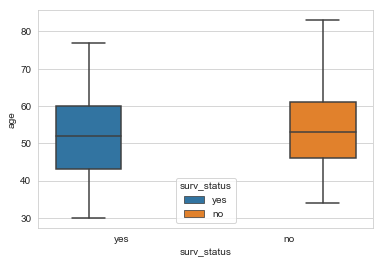

In [14]:
sns.boxplot(x='surv_status', y='age', data=df, hue='surv_status')
plt.show()

**Observations From The Plot Above**: Massive overlaps between 25th, 50th & 75th percentile data points for surv_status = 1 & 2 when considering single feature *age*.

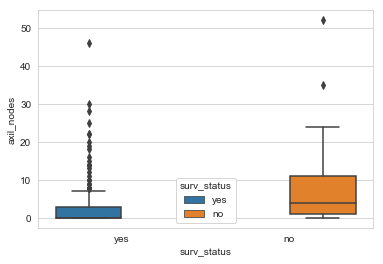

In [15]:
sns.boxplot(x='surv_status', y='axil_nodes', data=df, hue='surv_status')
plt.show()

**Observations From The Plot Above**: Massive overlaps between 25th, 50th & 75th percentile data points for surv_status = 1 & 2 when considering single feature *axil_nodes*.

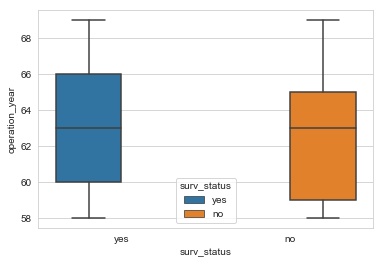

In [16]:
sns.boxplot(x='surv_status', y='operation_year', data=df, hue='surv_status')
plt.show()

**Observations From The Plot Above**: Massive overlaps between 25th, 50th & 75th percentile data points for surv_status = 1 & 2 when considering single feature *operation_year*.

### 2.4 PDF & CDF

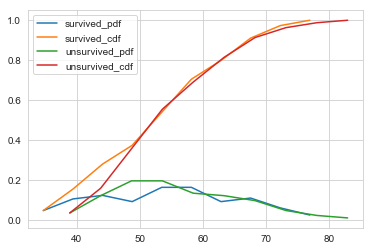

In [17]:
df_surv = df[df['surv_status'] == 'yes']
df_couldnt_surv = df[df['surv_status'] == 'no']

counts, bin_edges = np.histogram(df_surv['age'], bins=10, density=False)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

counts, bin_edges = np.histogram(df_couldnt_surv['age'], bins=10, density=False)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['survived_pdf', 'survived_cdf', 'unsurvived_pdf', 'unsurvived_cdf'])

plt.show()

### Observations From PDF, CDF
* Lots of overlaps between the pdf of both classes (1 & 2)
* cdf of both classes follow a similar path after a given point making it difficult to distinguish between the survived and unsurvived.

### 3.0 Conclusion

Unclear to distinguish between the 2 classes (1 & 2) using all the methods used above.